Length of waiting_times: 25976
Length of satisfaction: 25976


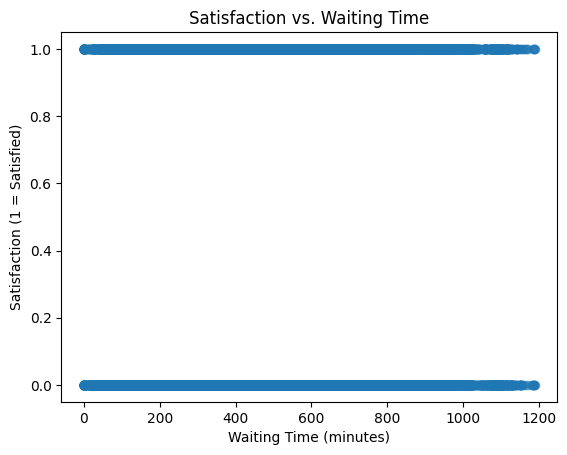

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate loading the data
# For this example, I'll use the provided data snippet as a pandas DataFrame
data = pd.read_csv("flight_data.csv")  # Replace with actual CSV loading if needed
inter_arrival_times = data["Arrival Delay in Minutes"].fillna(0).values
service_times = data["Departure Delay in Minutes"].values

# Simulation
np.random.seed(42)
n_customers = len(data)
arrival_times = np.cumsum(inter_arrival_times)
service_start_times = np.zeros(n_customers)
service_end_times = np.zeros(n_customers)
waiting_times = np.zeros(n_customers)  # Initialize waiting times for all customers

current_time = 0
for i in range(n_customers):
    # Customer arrives
    current_time = max(current_time, arrival_times[i])
    if i == 0 or current_time >= service_end_times[i-1]:
        service_start_times[i] = current_time
        waiting_times[i] = 0  # No waiting
    else:
        waiting_times[i] = service_end_times[i-1] - arrival_times[i]  # Waiting time
        service_start_times[i] = service_end_times[i-1]
    service_end_times[i] = service_start_times[i] + service_times[i]

# Verify lengths match
print(f"Length of waiting_times: {len(waiting_times)}")
print(f"Length of satisfaction: {len(data['satisfaction'])}")

# Plot Satisfaction vs. Waiting Time
plt.scatter(waiting_times, data["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0}), alpha=0.5)
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Satisfaction (1 = Satisfied)")
plt.title("Satisfaction vs. Waiting Time")
plt.show()

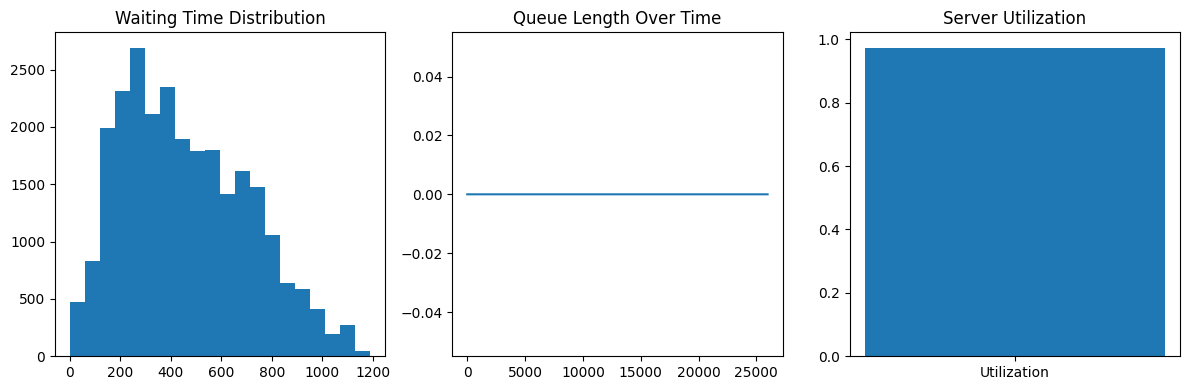

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(waiting_times, bins=20)
plt.title("Waiting Time Distribution")
plt.subplot(1, 3, 2)
plt.plot(np.arange(n_customers), [max(0, i - j) for i, j in zip(arrival_times, service_end_times)])
plt.title("Queue Length Over Time")
plt.subplot(1, 3, 3)
plt.bar(["Utilization"], [utilization])
plt.title("Server Utilization")
plt.tight_layout()
plt.show()

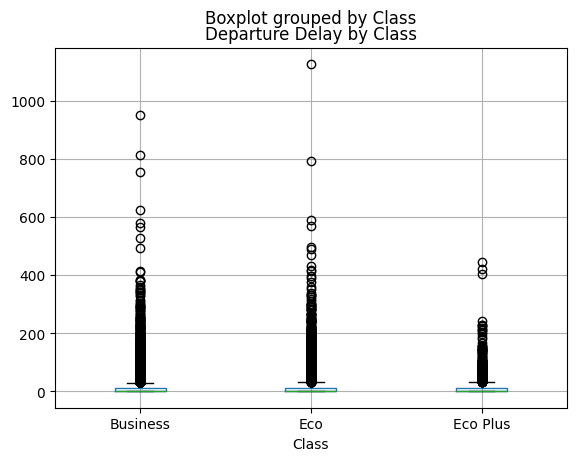

In [39]:
data.boxplot(column="Departure Delay in Minutes", by="Class")
plt.title("Departure Delay by Class")
plt.show()